In [1]:
from keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image 
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import pickle
import keras_resnet
import pickle

### keras for training
from keras.backend import tf as ktf

# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

### Mixed model
# import the necessary packages
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate

## Image Hash
import imagehash


# Plots
%matplotlib inline
# hash and similarity function
import imagehash
import skimage.measure  as ssim
from numbers import Number
import random

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from scipy import sum, average
from scipy.spatial.distance import directed_hausdorff

Using TensorFlow backend.


In [2]:
#model = load_model('ResNet-101-model.keras.h5', custom_objects={'BatchNormalization': keras_resnet.layers.BatchNormalization},compile=False)


In [3]:
# cnn model 
cnn_model = ResNet50(weights='imagenet',include_top=False,pooling="avg")
cnn_model2 = ResNet50(weights='imagenet',include_top=False)


Instructions for updating:
Colocations handled automatically by placer.


/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
model = load_model('my_model.h5') 


Instructions for updating:
Use tf.cast instead.


# Similarity Score 

In [113]:
test = image.load_img('test2.jpg', target_size=(224, 224))

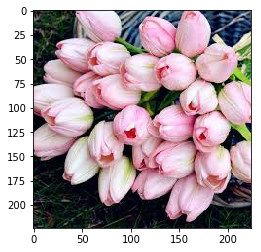

In [291]:
plt.imshow(test)

In [292]:
# feature map for the image

def index_query(image_path, cnn_model):
    
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(x.shape)
    query = cnn_model.predict(x)
    print(query.shape)
    query = query.flatten()
    print(query.shape)
    imgplot = plt.imshow(img)
    plt.show()
    
    return query

In [293]:
# load the index file
# If this does not load one needs to save the file
# scroll down to load_save images 
# run the cell with sear_list/ data_file
with open('search_index.pkl', 'rb') as f:
    indexes = pickle.load(f)

In [117]:
# helper function to plot the topn results retrieved
def plot_results(selected_images, highlight = None):
    
    n = len(selected_images)
    
    fig = plt.figure(figsize=(20,10))
    
    for i in range(n):
        x = round(n / 5)
        a = fig.add_subplot(x,5,i+1)
        img = selected_images[i][0]
        #img = image.load_img(image_path, target_size=(224, 224))
        plt.imshow(img)
        if i == highlight:
            a.set_title("RELEVANT")
        else:
            a.set_title(str(selected_images[i][1]))
        
    plt.show()

In [282]:
# for the purpose of comparison, I use the Euclidean Distance between the feature vectors

def find_query_l2(query_index, indexes, topn):
    
    retrieved = []

    for indx in indexes:
        search_image = indx[0]
        search_indx = indx[1]
        diff = query_index - search_indx 
        diff = diff**2
        match_score = sum(diff)
        retrieved.append((search_image, match_score))
        
    sorted_retreival = sorted(retrieved, key=lambda x: x[1])

    selected = sorted_retreival[:topn]
    return selected


# helper function to do the retreival
# inputs - the query index computed from the cnn_model, 
#          the indexes list 
#          and the number of results to retreive (topn)
# outputs - a list of tuples containing the retrieved image paths and their respective scores

def find_query(query_index, indexes, topn):
    
    retrieved = []

    for indx in indexes:
        search_image = indx[0]
        search_indx = indx[1]
        diff = query_index - search_indx 
        diff = diff**2
        diff = np.reshape(diff,(1,2048))
        match_score =model.predict(diff.reshape(1,-1))# model.predict(diff.reshape(-1,1))
        retrieved.append((search_image, match_score))
        
    sorted_retreival = sorted(retrieved, key=lambda x: x[1])
    
    selected = sorted_retreival[:topn]
    return selected

# Test Retrieval Model

(1, 224, 224, 3)
(1, 2048)
(2048,)


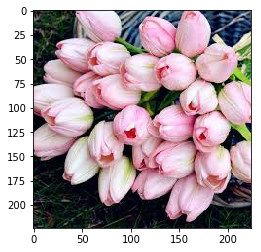

In [294]:
query_index = index_query('test2.jpg',cnn_model)

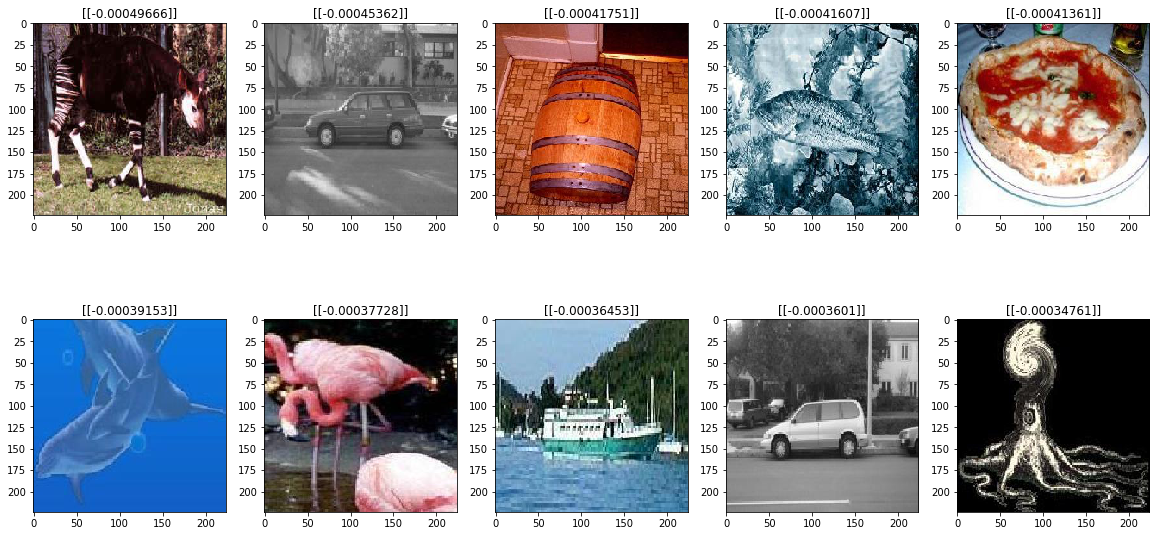

In [295]:
results = find_query(query_index, indexes, 10)
plot_results(results)

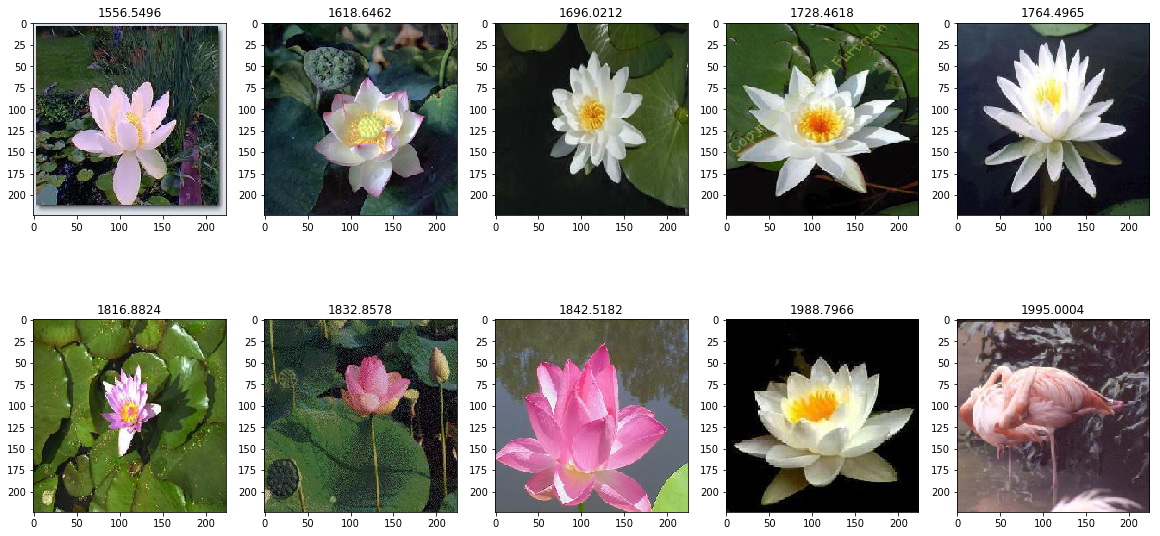

In [195]:
results = find_query_l2(query_index, indexes, 10)
plot_results(results)

### Load and save Images 

In [22]:
%matplotlib inline
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [73]:

image_list = []
for filename in glob.glob('101_ObjectCategories/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

In [75]:
# save and load images 
### No need to run this again. Just use the data file zip file
import os
fis=[]
rootdir=os.walk('101_ObjectCategories/')
save_path= os.getcwd()+ '/data_file/'
image_amount = 9
for subd in rootdir :
    #print(subd[1])
    j=0
    for name in subd[1]:
        i = 0
        for filename in glob.glob('101_ObjectCategories/'+name+'/*.jpg'):
            if i < image_amount:
                #print(name,filename)
                im=Image.open(open(filename, 'rb'))
                #im=Image.open(os.src_fname, ext = os.path.splitext(x)path.join(root,name))
                src_fname, ext = os.path.splitext(filename)
                #print(src_fname,ext)
                #plt.imshow(im) 
                save_fname = os.path.join(save_path,'data_'+str(j)+'.jpg')
                #with open(save_path, 'w') as f:
                im.save(open(save_fname, 'wb'),'jpeg')
                fis.append(im)
                i+=1; j+=1
               

In [ ]:
search_list = []
for filename in glob.glob('data_file/*.jpg'): #assuming gif
    #print(filename)
    #im=Image.open(filename)
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    query = cnn_model.predict(x)
    query = query.flatten()
    search_list.append((img,query))

In [ ]:
with open('data_processed.pkl', 'wb') as f:
    pickle.dump(fis, f)

In [ ]:
with open('search_index.pkl', 'wb') as f:
    pickle.dump(search_list, f)

# Image prediction 

In [30]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="tanh"))
 
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
 
	# return our model
	return model

In [296]:
model = Sequential()
model.add(Dense(input_dim=query_index.shape[0], units=256))
model.add(Activation("tanh"))
model.add(Dropout(0.50))
model.add(Dense(units=128))
model.add(Activation("tanh"))
model.add(Dropout(0.50))
model.add(Dense(units=64))
model.add(Activation("linear"))
model.add(Dropout(0.50))
model.add(Dense(units=1))

#model.compile("nadam", "mae")

In [297]:
opt = Adam(lr=1e-8)
model.compile(loss="mse", optimizer=opt)

In [158]:
def similarity_score(x,y,i,j):
    '''
    return similarity score
    '''
    ssimValue = ssim.compare_ssim(x,y,multichannel=True )
    hashes=imagehash.dhash(i)-imagehash.dhash(j)

    if hashes != 0:  # it is an integer or a float
        return ssimValue/hashes
    else:
        return ssimValue

In [161]:
# images and vector representation
score_list = []
train_input_1 = []
#train_input_2 =[]
# generate training data
for i in range(1,500):
    random.shuffle(indexes)
    images = [i[0] for i in indexes]
    vec =  [i[1] for i in indexes]
    for i in range(0,100):
        
        indices = random.sample(range(0, len(images)), 2)
        img = [images[i] for i in indices]
        #vectors = [vec[i] for i in indices]
        #print(indices, len(images))
        score = similarity_score(image.img_to_array(img[0]),image.img_to_array(img[1]), img[0], img[1])
        score_list.append(score)
        train_input_1.append((vec[indices[0]]-vec[indices[1]])**2)
        #train_input_2.append(vec[indices[1]])
        
    
        
    
    

In [162]:
with open('train_input_1.pkl', 'wb') as f:
    pickle.dump(train_input_1, f)

In [163]:
with open('train_input_2.pkl', 'wb') as f:
    pickle.dump(train_input_2, f)

In [164]:
with open('score_list.pkl', 'wb') as f:
    pickle.dump(score_list, f)

In [165]:
def generator(batch_size,from_list_x,from_list_y):

    assert len(from_list_x) == len(from_list_y)
    total_size = len(from_list_x)

    while True: #keras generators should be infinite

        for i in range(0,total_size,batch_size):
            yield np.array(from_list_x[i:i+batch_size]), np.array(from_list_y[i:i+batch_size])

In [ ]:
# train the model
size = 100
print("[INFO] training model...")
model.fit_generator(
	generator(size,train_input_1,score_list),
    steps_per_epoch=len(train_input_1 )//size,
	epochs=10000, shuffle = True)

[INFO] training model...
Epoch 1/10000
499/499 [==============================] - 11s 22ms/step - loss: 6.1826
Epoch 2/10000
499/499 [==============================] - 7s 15ms/step - loss: 6.1623
Epoch 3/10000
499/499 [==============================] - 8s 15ms/step - loss: 6.1407
Epoch 4/10000
499/499 [==============================] - 8s 16ms/step - loss: 6.1382
Epoch 5/10000
499/499 [==============================] - 7s 15ms/step - loss: 6.2046
Epoch 6/10000
499/499 [==============================] - 9s 19ms/step - loss: 6.2513
Epoch 7/10000
499/499 [==============================] - 11s 22ms/step - loss: 6.1577
Epoch 8/10000
499/499 [==============================] - 8s 17ms/step - loss: 6.1618
Epoch 9/10000
499/499 [==============================] - 8s 17ms/step - loss: 6.1760
Epoch 10/10000
499/499 [==============================] - 8s 17ms/step - loss: 6.0894
Epoch 11/10000
499/499 [==============================] - 8s 17ms/step - loss: 6.2137
Epoch 12/10000
499/499 [============

499/499 [==============================] - 13s 25ms/step - loss: 6.0529
Epoch 96/10000
499/499 [==============================] - 8s 16ms/step - loss: 5.9840
Epoch 97/10000
499/499 [==============================] - 13s 25ms/step - loss: 6.0324
Epoch 98/10000
499/499 [==============================] - 8s 16ms/step - loss: 6.0449
Epoch 99/10000
499/499 [==============================] - 11s 21ms/step - loss: 6.0808
Epoch 100/10000
499/499 [==============================] - 11s 22ms/step - loss: 6.0594
Epoch 101/10000
499/499 [==============================] - 11s 22ms/step - loss: 6.0119
Epoch 102/10000
499/499 [==============================] - 10s 20ms/step - loss: 5.9854
Epoch 103/10000
499/499 [==============================] - 9s 17ms/step - loss: 6.0777
Epoch 104/10000
499/499 [==============================] - 12s 25ms/step - loss: 5.9913
Epoch 105/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.9770
Epoch 106/10000
499/499 [==============================]

499/499 [==============================] - 8s 17ms/step - loss: 5.8914
Epoch 189/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.9296
Epoch 190/10000
499/499 [==============================] - 8s 16ms/step - loss: 5.9126
Epoch 191/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.9546
Epoch 192/10000
499/499 [==============================] - 8s 16ms/step - loss: 5.9444
Epoch 193/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.9470
Epoch 194/10000
499/499 [==============================] - 10s 21ms/step - loss: 5.9311
Epoch 195/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.8890
Epoch 196/10000
499/499 [==============================] - 11s 21ms/step - loss: 5.8993
Epoch 197/10000
499/499 [==============================] - 10s 20ms/step - loss: 5.8664
Epoch 198/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.9586
Epoch 199/10000
499/499 [============================

499/499 [==============================] - 13s 26ms/step - loss: 5.8436
Epoch 282/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.8829
Epoch 283/10000
499/499 [==============================] - 12s 25ms/step - loss: 5.7875
Epoch 284/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.8736
Epoch 285/10000
499/499 [==============================] - 11s 21ms/step - loss: 5.8096
Epoch 286/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.8316
Epoch 287/10000
499/499 [==============================] - 10s 21ms/step - loss: 5.9095
Epoch 288/10000
499/499 [==============================] - 10s 21ms/step - loss: 5.7627
Epoch 289/10000
499/499 [==============================] - 11s 21ms/step - loss: 5.8433
Epoch 290/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.8544
Epoch 291/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.8082
Epoch 292/10000
499/499 [=======================

499/499 [==============================] - 11s 21ms/step - loss: 5.7638
Epoch 375/10000
499/499 [==============================] - 11s 21ms/step - loss: 5.7764
Epoch 376/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.8042
Epoch 377/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.7102
Epoch 378/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.7773
Epoch 379/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.7177
Epoch 380/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.7784
Epoch 381/10000
499/499 [==============================] - 13s 27ms/step - loss: 5.6147
Epoch 382/10000
499/499 [==============================] - 12s 23ms/step - loss: 5.8022
Epoch 383/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.7573
Epoch 384/10000
499/499 [==============================] - 13s 27ms/step - loss: 5.8063
Epoch 385/10000
499/499 [=========================

499/499 [==============================] - 13s 26ms/step - loss: 5.6258
Epoch 468/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.6515
Epoch 469/10000
499/499 [==============================] - 12s 25ms/step - loss: 5.6205
Epoch 470/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.6447
Epoch 471/10000
499/499 [==============================] - 12s 23ms/step - loss: 5.5669
Epoch 472/10000
499/499 [==============================] - 10s 20ms/step - loss: 5.6327
Epoch 473/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.6261
Epoch 474/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.7190
Epoch 475/10000
499/499 [==============================] - 9s 19ms/step - loss: 5.6004
Epoch 476/10000
499/499 [==============================] - 12s 23ms/step - loss: 5.6443
Epoch 477/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.5962
Epoch 478/10000
499/499 [===========================

499/499 [==============================] - 10s 19ms/step - loss: 5.5419
Epoch 561/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.5222
Epoch 562/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.5346
Epoch 563/10000
499/499 [==============================] - 10s 20ms/step - loss: 5.5326
Epoch 564/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.5192
Epoch 565/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.5950
Epoch 566/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.5851
Epoch 567/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.5352
Epoch 568/10000
499/499 [==============================] - 11s 21ms/step - loss: 5.5403
Epoch 569/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.6147
Epoch 570/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.6258
Epoch 571/10000
499/499 [==========================

499/499 [==============================] - 9s 18ms/step - loss: 5.4665
Epoch 654/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.4466
Epoch 655/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.4626
Epoch 656/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.4417
Epoch 657/10000
499/499 [==============================] - 14s 28ms/step - loss: 5.4096
Epoch 658/10000
499/499 [==============================] - 8s 16ms/step - loss: 5.4275
Epoch 659/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.5032
Epoch 660/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.4774
Epoch 661/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.4387
Epoch 662/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.3992
Epoch 663/10000
499/499 [==============================] - 8s 16ms/step - loss: 5.4501
Epoch 664/10000
499/499 [==============================] 

499/499 [==============================] - 12s 24ms/step - loss: 5.4306
Epoch 747/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.3612
Epoch 748/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.3370
Epoch 749/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.3726
Epoch 750/10000
499/499 [==============================] - 14s 29ms/step - loss: 5.3878
Epoch 751/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.3514
Epoch 752/10000
499/499 [==============================] - 13s 27ms/step - loss: 5.3865
Epoch 753/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.4017
Epoch 754/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.3818
Epoch 755/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.4197
Epoch 756/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.4010
Epoch 757/10000
499/499 [=======================

499/499 [==============================] - 14s 29ms/step - loss: 5.2920
Epoch 840/10000
499/499 [==============================] - 17s 33ms/step - loss: 5.3219
Epoch 841/10000
499/499 [==============================] - 17s 34ms/step - loss: 5.3438
Epoch 842/10000
499/499 [==============================] - 17s 34ms/step - loss: 5.2966
Epoch 843/10000
499/499 [==============================] - 15s 30ms/step - loss: 5.2826
Epoch 844/10000
499/499 [==============================] - 17s 35ms/step - loss: 5.3258
Epoch 845/10000
499/499 [==============================] - 16s 32ms/step - loss: 5.3127
Epoch 846/10000
499/499 [==============================] - 16s 33ms/step - loss: 5.3025
Epoch 847/10000
499/499 [==============================] - 16s 33ms/step - loss: 5.3248
Epoch 848/10000
499/499 [==============================] - 15s 29ms/step - loss: 5.3492
Epoch 849/10000
499/499 [==============================] - 19s 37ms/step - loss: 5.3666
Epoch 850/10000
499/499 [=======================

499/499 [==============================] - 15s 31ms/step - loss: 5.2492
Epoch 933/10000
499/499 [==============================] - 17s 35ms/step - loss: 5.2845
Epoch 934/10000
499/499 [==============================] - 16s 33ms/step - loss: 5.2598
Epoch 935/10000
499/499 [==============================] - 15s 30ms/step - loss: 5.2230
Epoch 936/10000
499/499 [==============================] - 18s 37ms/step - loss: 5.2078
Epoch 937/10000
499/499 [==============================] - 17s 34ms/step - loss: 5.1832
Epoch 938/10000
499/499 [==============================] - 15s 30ms/step - loss: 5.2259
Epoch 939/10000
499/499 [==============================] - 17s 34ms/step - loss: 5.2377
Epoch 940/10000
499/499 [==============================] - 18s 35ms/step - loss: 5.2860
Epoch 941/10000
499/499 [==============================] - 17s 34ms/step - loss: 5.2571
Epoch 942/10000
499/499 [==============================] - 15s 31ms/step - loss: 5.2373
Epoch 943/10000
499/499 [=======================

499/499 [==============================] - 9s 17ms/step - loss: 5.2550
Epoch 1026/10000
499/499 [==============================] - 11s 23ms/step - loss: 5.2097
Epoch 1027/10000
499/499 [==============================] - 10s 21ms/step - loss: 5.0926
Epoch 1028/10000
499/499 [==============================] - 12s 23ms/step - loss: 5.1246
Epoch 1029/10000
499/499 [==============================] - 9s 19ms/step - loss: 5.1798
Epoch 1030/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.0922
Epoch 1031/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.1617
Epoch 1032/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.2016
Epoch 1033/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.1966
Epoch 1034/10000
499/499 [==============================] - 13s 25ms/step - loss: 5.1591
Epoch 1035/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.1907
Epoch 1036/10000
499/499 [=================

499/499 [==============================] - 8s 17ms/step - loss: 5.1667
Epoch 1118/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.0612
Epoch 1119/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.1296
Epoch 1120/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.0989
Epoch 1121/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.1310
Epoch 1122/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.1011
Epoch 1123/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.0782
Epoch 1124/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.0794
Epoch 1125/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.0814
Epoch 1126/10000
499/499 [==============================] - 9s 19ms/step - loss: 5.1116
Epoch 1127/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.0656
Epoch 1128/10000
499/499 [=====================

499/499 [==============================] - 10s 20ms/step - loss: 5.0870
Epoch 1210/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.0153
Epoch 1211/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9988
Epoch 1212/10000
499/499 [==============================] - 8s 17ms/step - loss: 5.0219
Epoch 1213/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.0925
Epoch 1214/10000
499/499 [==============================] - 11s 22ms/step - loss: 5.0475
Epoch 1215/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.0981
Epoch 1216/10000
499/499 [==============================] - 13s 26ms/step - loss: 5.0459
Epoch 1217/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.0148
Epoch 1218/10000
499/499 [==============================] - 9s 19ms/step - loss: 5.0584
Epoch 1219/10000
499/499 [==============================] - 9s 19ms/step - loss: 5.0038
Epoch 1220/10000
499/499 [==================

499/499 [==============================] - 8s 16ms/step - loss: 4.9515
Epoch 1302/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9493
Epoch 1303/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9329
Epoch 1304/10000
499/499 [==============================] - 12s 24ms/step - loss: 5.0039
Epoch 1305/10000
499/499 [==============================] - 9s 19ms/step - loss: 4.9755
Epoch 1306/10000
499/499 [==============================] - 9s 17ms/step - loss: 5.0219
Epoch 1307/10000
499/499 [==============================] - 9s 18ms/step - loss: 5.0009
Epoch 1308/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.9582
Epoch 1309/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9473
Epoch 1310/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9758
Epoch 1311/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.9892
Epoch 1312/10000
499/499 [======================

499/499 [==============================] - 9s 18ms/step - loss: 4.9405
Epoch 1395/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.9416
Epoch 1396/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.8475
Epoch 1397/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.9143
Epoch 1398/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.9720
Epoch 1399/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.9283
Epoch 1400/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8388
Epoch 1401/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8814
Epoch 1402/10000
499/499 [==============================] - 11s 23ms/step - loss: 4.9389
Epoch 1403/10000
499/499 [==============================] - 10s 21ms/step - loss: 4.8969
Epoch 1404/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8444
Epoch 1405/10000
499/499 [===================

499/499 [==============================] - 9s 18ms/step - loss: 4.8557
Epoch 1487/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8615
Epoch 1488/10000
499/499 [==============================] - 12s 24ms/step - loss: 4.8024
Epoch 1489/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8690
Epoch 1490/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8743
Epoch 1491/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8766
Epoch 1492/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8599
Epoch 1493/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8207
Epoch 1494/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8608
Epoch 1495/10000
499/499 [==============================] - 13s 25ms/step - loss: 4.8021
Epoch 1496/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.8170
Epoch 1497/10000
499/499 [=====================

499/499 [==============================] - 9s 17ms/step - loss: 4.7971
Epoch 1579/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.8027
Epoch 1580/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7942
Epoch 1581/10000
499/499 [==============================] - 12s 25ms/step - loss: 4.7768
Epoch 1582/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7945
Epoch 1583/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.8107
Epoch 1584/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.7727
Epoch 1585/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.8157
Epoch 1586/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7857
Epoch 1587/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.7149
Epoch 1588/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.8109
Epoch 1589/10000
499/499 [====================

499/499 [==============================] - 8s 17ms/step - loss: 4.7617
Epoch 1671/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7154
Epoch 1672/10000
499/499 [==============================] - 9s 19ms/step - loss: 4.7573
Epoch 1673/10000
499/499 [==============================] - 9s 19ms/step - loss: 4.7072
Epoch 1674/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.6613
Epoch 1675/10000
499/499 [==============================] - 12s 24ms/step - loss: 4.6916
Epoch 1676/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7306
Epoch 1677/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7641
Epoch 1678/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7403
Epoch 1679/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7383
Epoch 1680/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.7205
Epoch 1681/10000
499/499 [=====================

Epoch 1763/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7178
Epoch 1764/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.7000
Epoch 1765/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.7367
Epoch 1766/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.6759
Epoch 1767/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.6910
Epoch 1768/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.6848
Epoch 1769/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.7127
Epoch 1770/10000
499/499 [==============================] - 14s 27ms/step - loss: 4.6883
Epoch 1771/10000
499/499 [==============================] - 11s 22ms/step - loss: 4.7146
Epoch 1772/10000
499/499 [==============================] - 11s 22ms/step - loss: 4.6813
Epoch 1773/10000
499/499 [==============================] - 14s 28ms/step - loss: 4.6864
Epoch 1774/10000
499/499 [

499/499 [==============================] - 9s 18ms/step - loss: 4.6206
Epoch 1856/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.6351
Epoch 1857/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.6164
Epoch 1858/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.6403
Epoch 1859/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.6298
Epoch 1860/10000
499/499 [==============================] - 9s 17ms/step - loss: 4.6691
Epoch 1861/10000
499/499 [==============================] - 13s 27ms/step - loss: 4.6361
Epoch 1862/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.5833
Epoch 1863/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.6635
Epoch 1864/10000
499/499 [==============================] - 9s 19ms/step - loss: 4.5835
Epoch 1865/10000
499/499 [==============================] - 14s 28ms/step - loss: 4.6201
Epoch 1866/10000
499/499 [===================

499/499 [==============================] - 8s 17ms/step - loss: 4.5907
Epoch 1948/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5760
Epoch 1949/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5266
Epoch 1950/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5894
Epoch 1951/10000
499/499 [==============================] - 12s 24ms/step - loss: 4.5127
Epoch 1952/10000
499/499 [==============================] - 10s 20ms/step - loss: 4.5861
Epoch 1953/10000
499/499 [==============================] - 12s 25ms/step - loss: 4.5959
Epoch 1954/10000
499/499 [==============================] - 9s 17ms/step - loss: 4.5353
Epoch 1955/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5727
Epoch 1956/10000
499/499 [==============================] - 12s 24ms/step - loss: 4.5147
Epoch 1957/10000
499/499 [==============================] - 10s 19ms/step - loss: 4.5482
Epoch 1958/10000
499/499 [==================

499/499 [==============================] - 8s 17ms/step - loss: 4.5264
Epoch 2040/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.5130
Epoch 2041/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.4666
Epoch 2042/10000
499/499 [==============================] - 12s 25ms/step - loss: 4.4994
Epoch 2043/10000
499/499 [==============================] - 11s 23ms/step - loss: 4.5161
Epoch 2044/10000
499/499 [==============================] - 10s 20ms/step - loss: 4.4749
Epoch 2045/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5303
Epoch 2046/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.5797
Epoch 2047/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.5551
Epoch 2048/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.4964
Epoch 2049/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4893
Epoch 2050/10000
499/499 [=================

499/499 [==============================] - 8s 16ms/step - loss: 4.4671
Epoch 2132/10000
499/499 [==============================] - 12s 25ms/step - loss: 4.4538
Epoch 2133/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.4728
Epoch 2134/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.4681
Epoch 2135/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.4230
Epoch 2136/10000
499/499 [==============================] - 10s 21ms/step - loss: 4.4576
Epoch 2137/10000
499/499 [==============================] - 11s 21ms/step - loss: 4.4971
Epoch 2138/10000
499/499 [==============================] - 12s 23ms/step - loss: 4.4461
Epoch 2139/10000
499/499 [==============================] - 10s 19ms/step - loss: 4.4682
Epoch 2140/10000
499/499 [==============================] - 9s 18ms/step - loss: 4.5027
Epoch 2141/10000
499/499 [==============================] - 13s 26ms/step - loss: 4.4515
Epoch 2142/10000
499/499 [================

Epoch 2224/10000
499/499 [==============================] - 8s 15ms/step - loss: 4.4273
Epoch 2225/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4385
Epoch 2226/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4403
Epoch 2227/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.3689
Epoch 2228/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.4428
Epoch 2229/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4023
Epoch 2230/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4374
Epoch 2231/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3769
Epoch 2232/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3895
Epoch 2233/10000
499/499 [==============================] - 8s 15ms/step - loss: 4.4046
Epoch 2234/10000
499/499 [==============================] - 9s 17ms/step - loss: 4.3322
Epoch 2235/10000
499/499 [======

499/499 [==============================] - 8s 15ms/step - loss: 4.3443
Epoch 2318/10000
499/499 [==============================] - 12s 24ms/step - loss: 4.3662
Epoch 2319/10000
499/499 [==============================] - 8s 15ms/step - loss: 4.3160
Epoch 2320/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.3680
Epoch 2321/10000
499/499 [==============================] - 8s 15ms/step - loss: 4.3166
Epoch 2322/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3641
Epoch 2323/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.4078
Epoch 2324/10000
499/499 [==============================] - 8s 16ms/step - loss: 4.3660
Epoch 2325/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3420
Epoch 2326/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3361
Epoch 2327/10000
499/499 [==============================] - 8s 17ms/step - loss: 4.3946
Epoch 2328/10000
499/499 [======================

In [274]:
model.save("my_model.h5")

In [289]:
model.predict(train_input_1[1].reshape(1,-1))

array([[0.00010424]], dtype=float32)

In [290]:
score_list[1]

-0.0001237141592176632